## Working with Larger dataset MNIST 

Multiclass classification is neural network model:

- Predict more than 3 class of prediction
- It also means, it might have even 100 classes or more

We are gonna build the model for fashion MNIST classification
- Train set of the data - 60000 images
- Test set of the data - 10000 images

In [24]:
# Importing required packages within the dataset from tensorflow
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Since it build in dataset it spiled into two parts Train and Test
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [2]:
# Check the dataset shapes for both Train and Test
print(f"Training set shape:{train_data.shape}, {train_labels.shape}")
print(f"Testing set shape: {test_data.shape},{test_labels.shape}")

Training set shape:(60000, 28, 28), (60000,)
Testing set shape: (10000, 28, 28),(10000,)


Text(0.5, 1.0, '7')

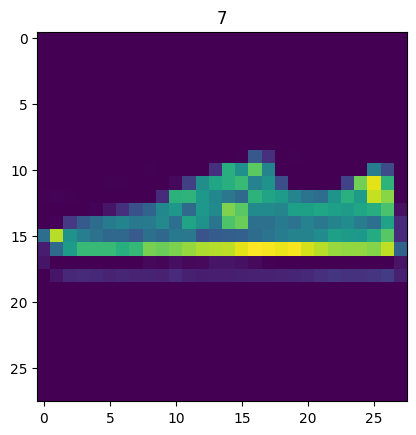

In [4]:
import matplotlib.pyplot as plt

# Plot one sample from data set
plt.imshow(train_data[14])
plt.title(train_labels[14])

## Lets make things a bit clear for human readable sense

Text(0.5, 1.0, 'Dress')

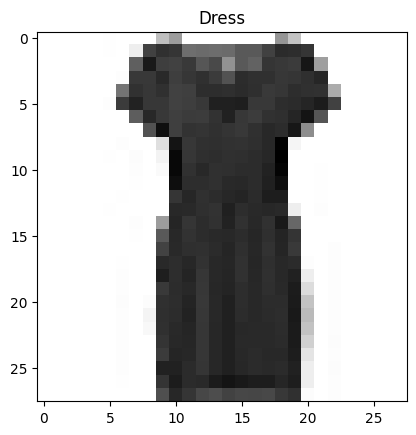

In [6]:
# Creatign labels
class_labels = ["T-shirt", "Trousers", "Pullover","Dress","Coat","Sandal", "Shirt", "Sneakers","Bag", "Abkle boot"]

# Ploting the images with their names
index_of_choice = 20
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_labels[train_labels[index_of_choice]])

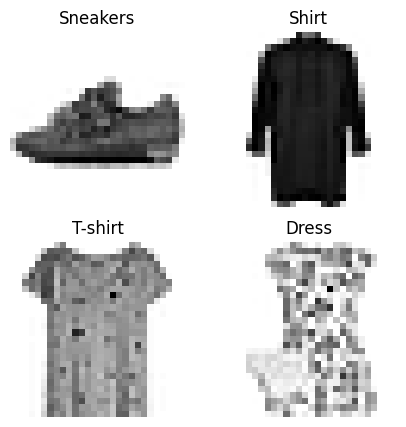

In [7]:
# Ploting multiple images once
import random

# Initializing figure size
plt.figure(figsize=(5, 5))

# Looping through for 4 images at once
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    # Setting up random index for diffrent images
    random_index = random.choice(range(len(train_data)))
    # Ploting the images with random index
    plt.imshow(train_data[random_index], cmap=plt.cm.binary)
    # Plot the title along with image for a human readable purpose
    plt.title(class_labels[train_labels[random_index]])
    plt.axis(False)


### Building Multi-Class classification model

**Step to build a model**
1. Create or import a model wiht activation functions
2. Compile the model with some optmization functions
3. Fitting the model with Train set of the dataset
4. Evaluate the model
5. Tweak a model

In [ ]:
# Building a model
tf.random.set_seed(42)

# Flatten the input data
train_data_flattened = train_data.reshape((train_data.shape[0], 28*28))
test_data_flattened = test_data.reshape((test_data.shape[0], 28*28))

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=(28*28,)),  # Flattened input shape
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")  # Output layer with 10 units for 10 classes
])

# 2. Complie the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"]
              )

# 3. Fit the model with train set
history = model.fit(
    train_data_flattened, 
    train_labels, 
    epochs=100, 
    verbose=2, 
    validation_data=(test_data_flattened, test_labels)
)

In [11]:

tf.random.set_seed(42)

# Flatten the input data
train_data_flattened = train_data.reshape((train_data.shape[0], 28*28))
test_data_flattened = test_data.reshape((test_data.shape[0], 28*28))

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=(28*28,)),  # Flattened input shape
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")  # Output layer with 10 units for 10 classes
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# 3. Fit the model with train set
history = model.fit(
    train_data_flattened, 
    train_labels, 
    epochs=100, 
    verbose=2, 
    validation_data=(test_data_flattened, test_labels)
)


Epoch 1/100
1875/1875 - 7s - 4ms/step - accuracy: 0.7397 - loss: 2.3499 - val_accuracy: 0.7895 - val_loss: 0.6978
Epoch 2/100
1875/1875 - 5s - 3ms/step - accuracy: 0.8077 - loss: 0.5769 - val_accuracy: 0.8034 - val_loss: 0.5552
Epoch 3/100
1875/1875 - 5s - 2ms/step - accuracy: 0.8273 - loss: 0.4911 - val_accuracy: 0.8055 - val_loss: 0.5429
Epoch 4/100
1875/1875 - 5s - 3ms/step - accuracy: 0.8373 - loss: 0.4524 - val_accuracy: 0.8217 - val_loss: 0.5033
Epoch 5/100
1875/1875 - 5s - 2ms/step - accuracy: 0.8455 - loss: 0.4286 - val_accuracy: 0.8287 - val_loss: 0.4792
Epoch 6/100
1875/1875 - 5s - 3ms/step - accuracy: 0.8533 - loss: 0.4055 - val_accuracy: 0.8380 - val_loss: 0.4505
Epoch 7/100
1875/1875 - 5s - 3ms/step - accuracy: 0.8600 - loss: 0.3867 - val_accuracy: 0.8371 - val_loss: 0.4487
Epoch 8/100
1875/1875 - 7s - 4ms/step - accuracy: 0.8660 - loss: 0.3736 - val_accuracy: 0.8477 - val_loss: 0.4247
Epoch 9/100
1875/1875 - 5s - 3ms/step - accuracy: 0.8665 - loss: 0.3656 - val_accuracy: 

In [13]:
# Evaluating the model with test set of the dataset
test_loss, test_accuracy = model.evaluate(test_data_flattened, test_labels)

print(f"Accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8512 - loss: 0.7927
Accuracy: 0.8525000214576721


In [14]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

Since the neural networks likes normilized data, we will normilize the dataset

In [25]:
# Checking up the data range
train_data.min(), train_data.max()

(0, 255)

In [26]:
# Normilizing the data in range of 0 and 1
train_data = train_data / 255.0
test_data = test_data / 255.0

# Checking the scale of data after normilization
train_data.min(), train_data.max()

(0.0, 1.0)

In [28]:
# Now lets build a model with normilized set of the data
tf.random.set_seed(42)


# Flatten the input data
train_data_flattened = train_data.reshape((train_data.shape[0], 28*28))
test_data_flattened = test_data.reshape((test_data.shape[0], 28*28))

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu", input_shape=(28*28,)),  # Flattened input shape
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")  # Output layer with 10 units for 10 classes
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# 3. Fit the model with train set
history = model.fit(
    train_data_flattened, 
    train_labels, 
    epochs=10, 
    verbose=2, 
    validation_data=(test_data_flattened, test_labels)
)

C:\Users\baxti\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 - 4s - 2ms/step - accuracy: 0.5429 - loss: 1.2656 - val_accuracy: 0.6264 - val_loss: 0.9931
Epoch 2/10
1875/1875 - 2s - 1ms/step - accuracy: 0.6776 - loss: 0.8652 - val_accuracy: 0.7447 - val_loss: 0.7347
Epoch 3/10
1875/1875 - 4s - 2ms/step - accuracy: 0.7674 - loss: 0.6620 - val_accuracy: 0.7686 - val_loss: 0.6692
Epoch 4/10
1875/1875 - 7s - 3ms/step - accuracy: 0.7807 - loss: 0.6226 - val_accuracy: 0.7731 - val_loss: 0.6494
Epoch 5/10
1875/1875 - 4s - 2ms/step - accuracy: 0.7850 - loss: 0.6047 - val_accuracy: 0.7757 - val_loss: 0.6433
Epoch 6/10
1875/1875 - 5s - 3ms/step - accuracy: 0.7879 - loss: 0.5929 - val_accuracy: 0.7787 - val_loss: 0.6325
Epoch 7/10
1875/1875 - 5s - 3ms/step - accuracy: 0.7905 - loss: 0.5839 - val_accuracy: 0.7800 - val_loss: 0.6270
Epoch 8/10
1875/1875 - 3s - 2ms/step - accuracy: 0.7926 - loss: 0.5767 - val_accuracy: 0.7806 - val_loss: 0.6208
Epoch 9/10
1875/1875 - 4s - 2ms/step - accuracy: 0.7946 - loss: 0.5707 - val_accuracy: 0.7852 - 

In [29]:
# Evaluating the model with test set of the dataset
test_loss, test_accuracy = model.evaluate(test_data_flattened, test_labels)

print(f"Accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7992 - loss: 0.5953
Accuracy: 0.7939000129699707


<Axes: >

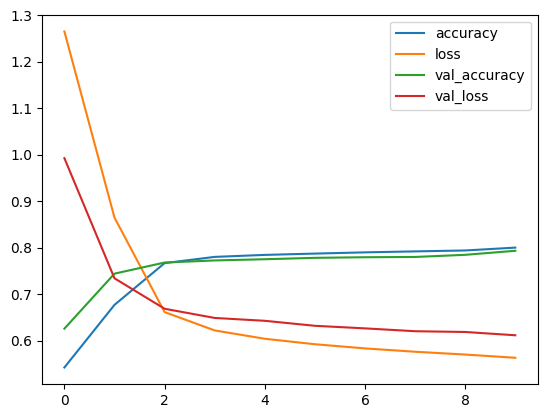

In [30]:
import pandas as pd

# Plot the model learning curve
pd.DataFrame(history.history).plot()

### Improving the model with learing rate and increasing epochs

In [34]:
# Now lets build a model with normilized set of the data
tf.random.set_seed(42)


# Flatten the input data
train_data_flattened = train_data.reshape((train_data.shape[0], 28*28))
test_data_flattened = test_data.reshape((test_data.shape[0], 28*28))

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation="relu", input_shape=(28*28,)),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")  
])

# 2. Compile the model
model_3.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # Addding learing rate paramaters
    metrics=["accuracy"]
)

# 3. Fit the model with train set
history_3 = model_3.fit(
    train_data_flattened, 
    train_labels, 
    epochs=20, # Increasing the epochs numbers 
    verbose=2, 
    validation_data=(test_data_flattened, test_labels)
)

Epoch 1/20
1875/1875 - 5s - 3ms/step - accuracy: 0.8146 - loss: 0.5279 - val_accuracy: 0.8365 - val_loss: 0.4470
Epoch 2/20
1875/1875 - 4s - 2ms/step - accuracy: 0.8611 - loss: 0.3862 - val_accuracy: 0.8543 - val_loss: 0.3977
Epoch 3/20
1875/1875 - 4s - 2ms/step - accuracy: 0.8738 - loss: 0.3468 - val_accuracy: 0.8581 - val_loss: 0.3884
Epoch 4/20
1875/1875 - 4s - 2ms/step - accuracy: 0.8809 - loss: 0.3240 - val_accuracy: 0.8594 - val_loss: 0.3813
Epoch 5/20
1875/1875 - 4s - 2ms/step - accuracy: 0.8872 - loss: 0.3057 - val_accuracy: 0.8651 - val_loss: 0.3706
Epoch 6/20
1875/1875 - 4s - 2ms/step - accuracy: 0.8925 - loss: 0.2910 - val_accuracy: 0.8652 - val_loss: 0.3784
Epoch 7/20
1875/1875 - 4s - 2ms/step - accuracy: 0.8971 - loss: 0.2783 - val_accuracy: 0.8692 - val_loss: 0.3680
Epoch 8/20
1875/1875 - 4s - 2ms/step - accuracy: 0.8996 - loss: 0.2677 - val_accuracy: 0.8683 - val_loss: 0.3746
Epoch 9/20
1875/1875 - 4s - 2ms/step - accuracy: 0.9040 - loss: 0.2580 - val_accuracy: 0.8654 - 

<Axes: >

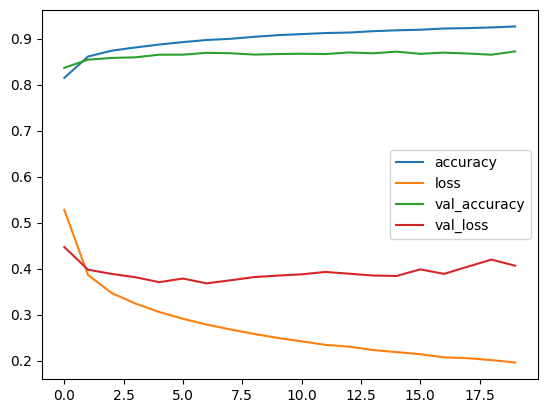

In [35]:
# Plot the model learning curve
pd.DataFrame(history_3.history).plot()